In [1]:
import numpy as np
import time
import gc

In [2]:
from models.bayesian_autoencoder import BayesianAutoencoder

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
# without gradient clipping
# 10 mc samples
# train everything with KL
# xavier initialization
n_inputs = 784
n_neurons_encoder = [128, 64]
n_latent = 2
n_neurons_decoder = [64, 128]
vi = BayesianAutoencoder('BAE_128_64_2',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.001, epochs=50, mc_samples=10)
print('Test Log-Likelihood: %.6f' % vi.benchmark())

   [29.0] Epoch: 01 | NELBO: 12527008.934732 | ELL: -227.635115 | KL: 7077.617737 | Val. ELL: -197.840820
   [30.1] Epoch: 02 | NELBO: 10708868.864802 | ELL: -194.704616 | KL: 114.980962 | Val. ELL: -191.496766
   [31.1] Epoch: 03 | NELBO: 10329524.247086 | ELL: -187.808869 | KL: 36.432874 | Val. ELL: -183.491043
   [30.9] Epoch: 04 | NELBO: 9944869.114219 | ELL: -180.815322 | KL: 26.423629 | Val. ELL: -177.690230
   [30.9] Epoch: 05 | NELBO: 9683166.400932 | ELL: -176.057183 | KL: 21.333139 | Val. ELL: -173.555625
   [31.2] Epoch: 06 | NELBO: 9464581.727273 | ELL: -172.082934 | KL: 20.335760 | Val. ELL: -169.482339
   [33.8] Epoch: 07 | NELBO: 9230421.752914 | ELL: -167.825495 | KL: 19.551283 | Val. ELL: -164.209905
   [42.9] Epoch: 08 | NELBO: 8942809.552448 | ELL: -162.596207 | KL: 18.178927 | Val. ELL: -159.744436
   [34.6] Epoch: 09 | NELBO: 8722853.216783 | ELL: -158.597017 | KL: 17.260720 | Val. ELL: -156.115861
   [37.2] Epoch: 10 | NELBO: 8528508.766900 | ELL: -155.063513 | KL

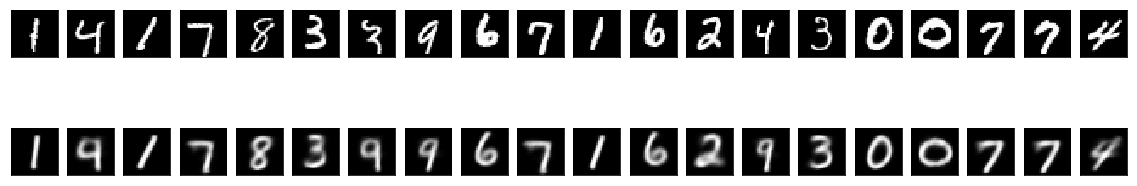

In [9]:
vi.plot_enc_dec(20, save=True)

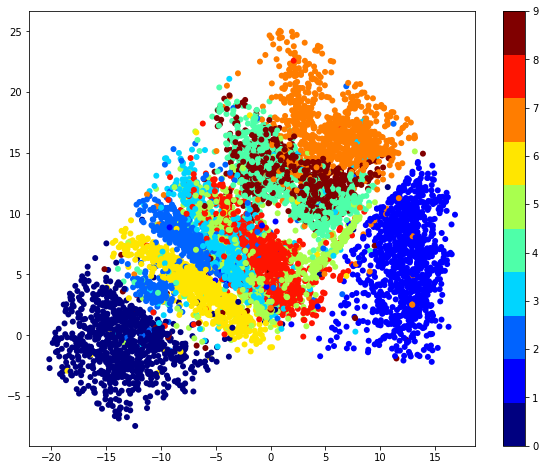

In [12]:
vi.plot_latent_repr(save=True)

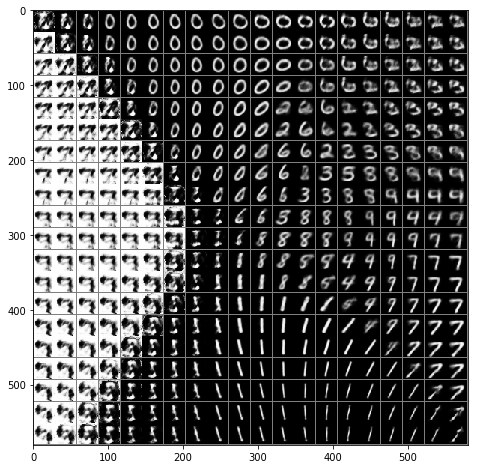

In [16]:
vi.plot_latent_recon(min_val=-20, max_val=20)

In [ ]:
171

In [5]:
# 1 sample
# uses gradient clipping
n_inputs = 784
n_neurons_encoder = [256, 128]
n_latent = 2
n_neurons_decoder = [128, 256]
vi = BayesianAutoencoder('BAE_256_128_2',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.001, epochs=50, mc_samples=10)

   [47.0] Epoch: 01 | NELBO: 11915886.559441 | ELL: -216.377139 | KL: 15143.939365 | Val. ELL: -197.452713
   [57.4] Epoch: 02 | NELBO: 10422523.303030 | ELL: -189.496080 | KL: 238.942181 | Val. ELL: -181.889163
   [56.2] Epoch: 03 | NELBO: 9757794.771562 | ELL: -177.413195 | KL: 69.074169 | Val. ELL: -172.056173
   [55.6] Epoch: 04 | NELBO: 9230719.370629 | ELL: -167.830199 | KL: 58.416763 | Val. ELL: -163.116749
   [55.0] Epoch: 05 | NELBO: 8840187.932401 | ELL: -160.729668 | KL: 56.133539 | Val. ELL: -156.812719
   [55.9] Epoch: 06 | NELBO: 8558306.279720 | ELL: -155.604597 | KL: 53.431594 | Val. ELL: -152.140587
   [50.5] Epoch: 07 | NELBO: 8328434.034965 | ELL: -151.425148 | KL: 50.879679 | Val. ELL: -148.607553
   [47.0] Epoch: 08 | NELBO: 8135224.325175 | ELL: -147.912259 | KL: 50.093755 | Val. ELL: -145.160114
   [45.1] Epoch: 09 | NELBO: 7988109.742424 | ELL: -145.237468 | KL: 49.026021 | Val. ELL: -143.056624
   [45.2] Epoch: 10 | NELBO: 7864524.921911 | ELL: -142.990508 | KL

In [6]:
vi.benchmark()

-130.75315710214468

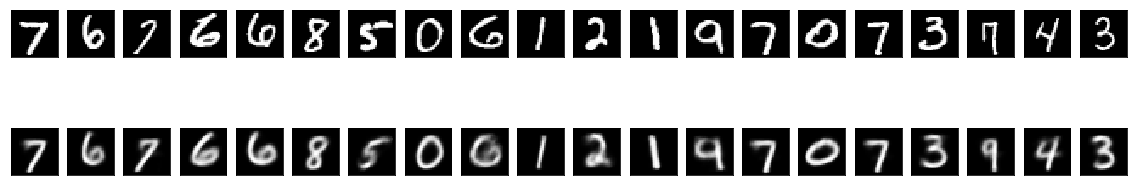

In [8]:
vi.plot_enc_dec(20, save=True)

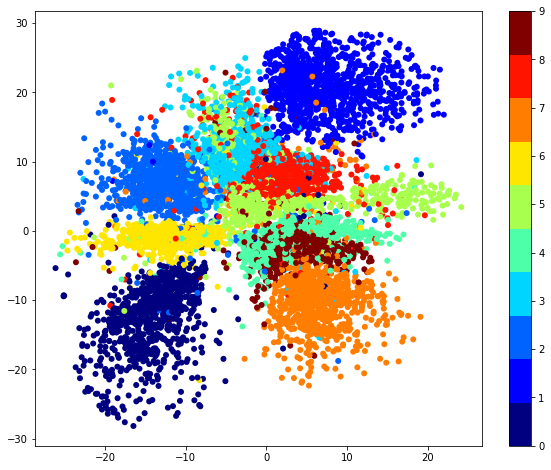

In [9]:
vi.plot_latent_repr(save=True)

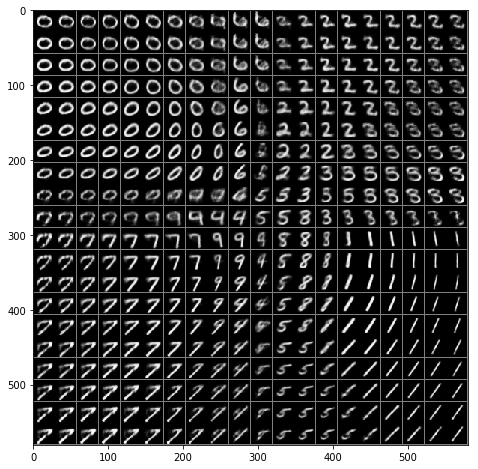

In [11]:
vi.plot_latent_recon(min_val=-30, max_val=30, save=True)

In [20]:
# 10 samples
# uses gradient clipping
n_inputs = 784
n_neurons_encoder = []
n_latent = 32
n_neurons_decoder = []
vi = BayesianAutoencoder('BAE_32',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.001, epochs=30)
print('Test Log-Likelihood: %.6f' % vi.benchmark())

   [22.8] Epoch: 01 | NELBO: 10888203.353147 | ELL: -197.936800 | KL: 1679.320497 | Val. ELL: -136.180734
   [22.7] Epoch: 02 | NELBO: 6595336.404429 | ELL: -119.913871 | KL: 73.511413 | Val. ELL: -105.190957
   [23.2] Epoch: 03 | NELBO: 5337932.038462 | ELL: -97.052779 | KL: 29.176573 | Val. ELL: -88.491935
   [23.3] Epoch: 04 | NELBO: 4634829.853147 | ELL: -84.269332 | KL: 16.574118 | Val. ELL: -80.562292
   [23.6] Epoch: 05 | NELBO: 4319892.797786 | ELL: -78.543317 | KL: 10.360569 | Val. ELL: -76.878587
   [23.5] Epoch: 06 | NELBO: 4203944.248252 | ELL: -76.435192 | KL: 8.690429 | Val. ELL: -75.590038
   [23.6] Epoch: 07 | NELBO: 4138986.708625 | ELL: -75.254148 | KL: 8.582453 | Val. ELL: -74.655778
   [23.6] Epoch: 08 | NELBO: 4108210.517483 | ELL: -74.694557 | KL: 9.883925 | Val. ELL: -74.408213
   [23.9] Epoch: 09 | NELBO: 4078796.234848 | ELL: -74.159755 | KL: 9.718872 | Val. ELL: -74.106843
   [23.9] Epoch: 10 | NELBO: 4066614.560023 | ELL: -73.938249 | KL: 10.846022 | Val. ELL

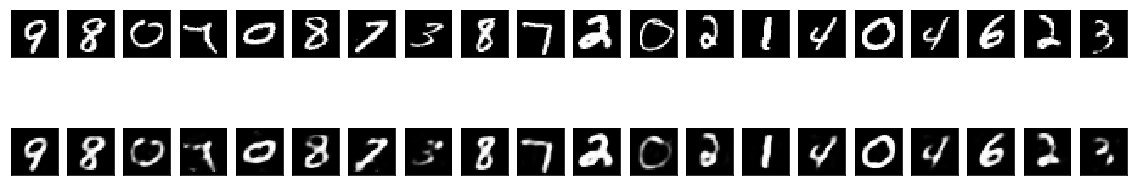

In [22]:
vi.plot_enc_dec(20, save=True)

In [ ]:
143

In [12]:
# 10 samples
# uses gradient clipping
n_inputs = 784
n_neurons_encoder = [128, 64]
n_latent = 32
n_neurons_decoder = [64, 128]
vi = BayesianAutoencoder('BAE_128_64_32',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.001, epochs=30, mc_samples=10)
print('Test Log-Likelihood: %.6f' % vi.benchmark())

   [28.9] Epoch: 01 | NELBO: 12676583.428904 | ELL: -230.342331 | KL: 7755.214689 | Val. ELL: -200.910215
   [30.8] Epoch: 02 | NELBO: 10686578.212121 | ELL: -194.298093 | KL: 183.072051 | Val. ELL: -189.604829
   [32.2] Epoch: 03 | NELBO: 9680005.410256 | ELL: -175.998550 | KL: 85.152986 | Val. ELL: -165.087229
   [32.2] Epoch: 04 | NELBO: 8759606.328671 | ELL: -159.264683 | KL: 48.753964 | Val. ELL: -152.786310
   [31.6] Epoch: 05 | NELBO: 8254808.630536 | ELL: -150.086744 | KL: 37.727612 | Val. ELL: -144.936587
   [31.7] Epoch: 06 | NELBO: 7824291.392774 | ELL: -142.259271 | KL: 31.462268 | Val. ELL: -138.023669
   [31.9] Epoch: 07 | NELBO: 7527624.107226 | ELL: -136.865428 | KL: 25.553706 | Val. ELL: -133.118994
   [32.0] Epoch: 08 | NELBO: 7309228.934732 | ELL: -132.894627 | KL: 24.434088 | Val. ELL: -129.878051
   [32.1] Epoch: 09 | NELBO: 7109182.597902 | ELL: -129.257455 | KL: 22.562688 | Val. ELL: -126.064716
   [32.2] Epoch: 10 | NELBO: 6975240.742424 | ELL: -126.822146 | KL:

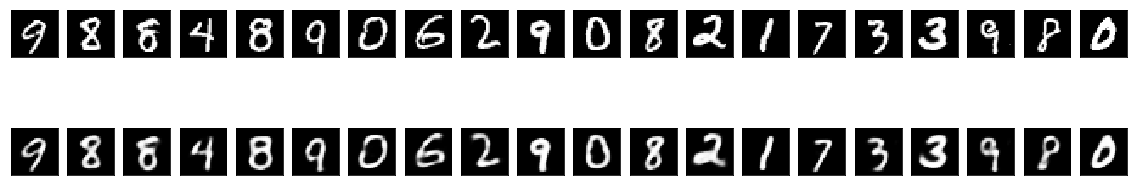

In [15]:
vi.plot_enc_dec(20, save=True)

In [11]:
vi.serialize('DUMPS/bae-simple/model.ckpt')

Model saved in file: DUMPS/bae-simple/model.ckpt


In [5]:
vi.restore('DUMPS/bae-simple/model.ckpt')

INFO:tensorflow:Restoring parameters from DUMPS/bae-simple/model.ckpt
